Logistic Regression

✅ Accuracy: 0.8733333333333333

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       163
           1       0.85      0.88      0.86       137

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



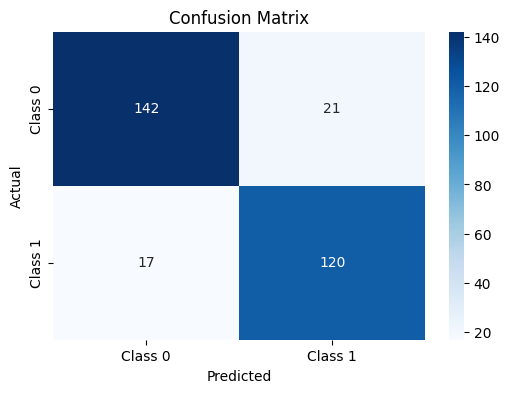

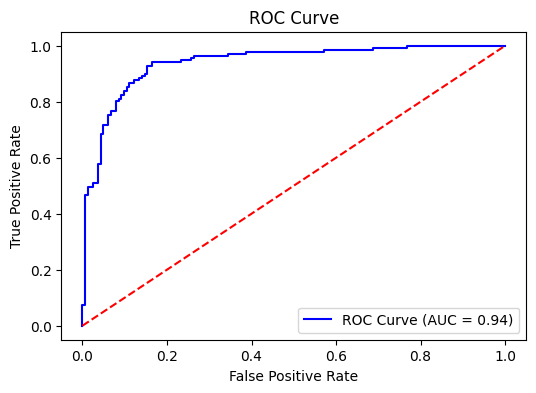


🔎 Feature Coefficients (Importance):
Feature 1: -0.3326
Feature 2: 0.2012
Feature 3: 2.0992
Feature 4: -0.1792


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# 1. Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=4, 
                           n_informative=2, n_redundant=0, 
                           random_state=42)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 4. Predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# 5. Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0","Class 1"], yticklabels=["Class 0","Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance
print("\n🔎 Feature Coefficients (Importance):")
for i, coef in enumerate(log_reg.coef_[0]):
    print(f"Feature {i+1}: {coef:.4f}")


K-means Clustering

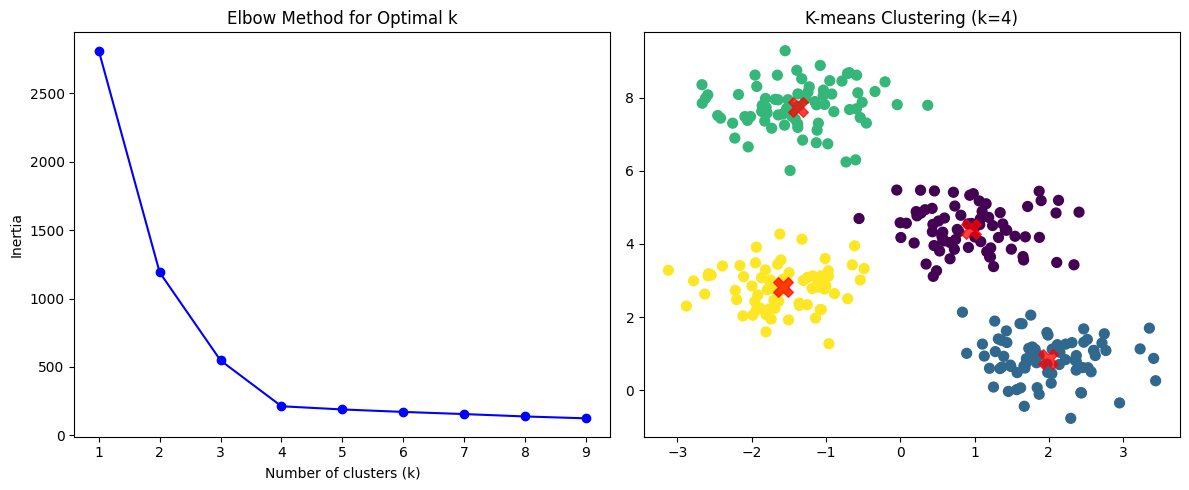

Cluster 1: Center = [0.94973532 4.41906906]
Cluster 2: Center = [1.98258281 0.86771314]
Cluster 3: Center = [-1.37324398  7.75368871]
Cluster 4: Center = [-1.58438467  2.83081263]

Number of points in each cluster:
0    75
1    75
2    75
3    75
Name: count, dtype: int64


In [3]:
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Use Elbow Method to find optimal k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")

# 3. Apply KMeans with chosen k=4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 4. Plot clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker="X")
plt.title("K-means Clustering (k=4)")

plt.tight_layout()
plt.show()

# 5. Extra info
for i, center in enumerate(centers, start=1):
    print(f"Cluster {i}: Center = {center}")
print("\nNumber of points in each cluster:")
print(pd.Series(y_kmeans).value_counts().sort_index())
